# Paper results


In [2]:
from code import * 
from code import advection_diffusion_inference_utils
import sys
sys.modules['advection_diffusion_inference_utils'] =  advection_diffusion_inference_utils
import matplotlib.pyplot as plt
%matplotlib inline

Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat/outputm1_l_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_l_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat/outputm1_l_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_l_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-

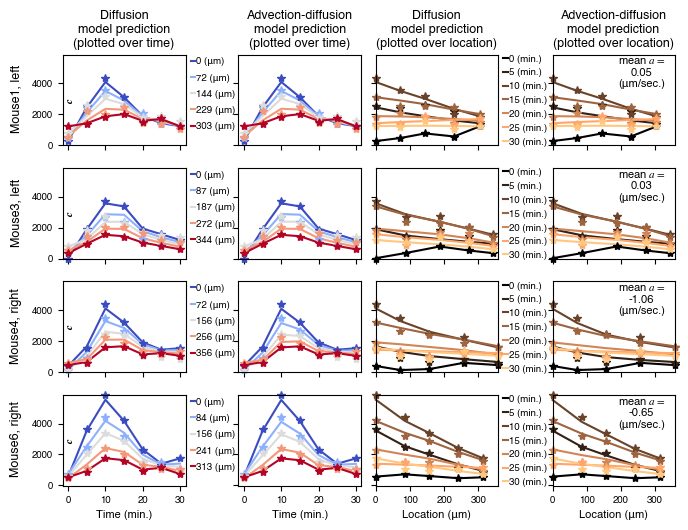

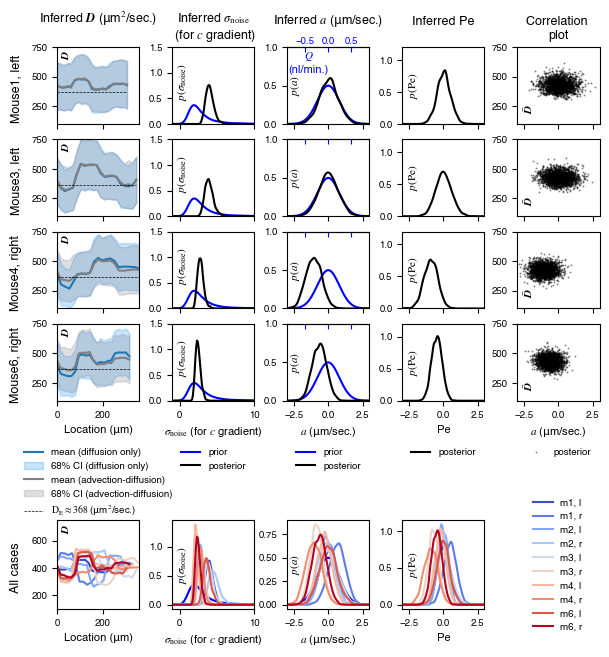

In [3]:
scenarios_dir = [
    "/Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7"
    ]
scenario_tags_list = [
    ["paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat",
     "paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat",
     "NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip",
     "NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip"],

    ]

num_scenarios = len(scenarios_dir)
figs_to_plot = [[1, 2, 3]]*num_scenarios
physics = [['diffusion', 'advection-diffusion']]*num_scenarios

i_fig = 0

animal_ear = [
    ('m1', 'l'),
    ('m3', 'l'),
    ('m4', 'r'),
    ('m6', 'r')
    ]
#animal_ear = [
#    ('m2', 'l')
#    ]
all_animals_ears = []

for animal in all_animals():
    for ear in all_ears():
        all_animals_ears.append((animal, ear))
data_diff_list, data_adv_list = read_all_scenarios_2(scenarios_dir[i_fig], scenario_tags_list[i_fig], animal_ear)
data_diff_list_all, data_adv_list_all = read_all_scenarios_2(scenarios_dir[i_fig], scenario_tags_list[i_fig], all_animals_ears)

# create directory if it does not exist
import os
os.makedirs('figures/'+scenario_tags_list[i_fig][0], exist_ok=True)

colormaps = [plt.colormaps.get_cmap('coolwarm'),
             plt.colormaps.get_cmap('copper')]
if 1 in figs_to_plot[i_fig]:

        plot_v3_fig1_c( data_diff_list, data_adv_list, colormaps=colormaps)
        #plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig3_c.pdf', bbox_inches='tight') 
        pass
if 2 in figs_to_plot[i_fig]:
        all_samples_a = plot_v3_fig2_II( data_diff_list, data_adv_list, data_diff_list_all, data_adv_list_all)
        # save figure and remove white space
        plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig2.pdf', bbox_inches='tight')
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.png')





In [4]:
if 3 in figs_to_plot[i_fig]:
    SMALL_SIZE = 7
    MEDIUM_SIZE =8
    BIGGER_SIZE = 9
    matplotlib_setup(SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE)
    real_times, real_locations, real_data, real_std_data, diff_locations, real_data_diff, real_std_data_diff = read_data_files(data_diff_list_all[2]['experiment_par'])

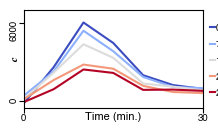

In [5]:

if 3 in figs_to_plot[i_fig]:
### Over time
    fig = plt.figure(figsize=(7*0.35, 0.5*7/2*0.66))
    plt.subplots_adjust(right=0.79, top=0.98, left=0.06, bottom=0.13)
    # set left, right, top, bottom to 0.1, 0.9, 0.9, 0.1
    #plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='over_time', d3_alpha=0.85,
                    colormap=colormaps[0])
    #plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend(lines, legend,
                        fontsize=SMALL_SIZE, frameon=False, ncol=1,
                        columnspacing=0.1, handletextpad=0.1, handlelength=0.5,
                        labelspacing=0.75, loc='upper right',
                        bbox_to_anchor=(0.99, 0.945),  mode="expand")
    plt.yticks(rotation=90, ticks=[0, 6000]) 
    plt.gca().tick_params(axis='y', pad=0)
    plt.gca().tick_params(axis='x', pad=1)
    plt.ylabel(r"$\boldsymbol{c}$")
    plt.gca().yaxis.set_label_coords(-0.02,0.5)

    plt.xticks(ticks=[0, 30])
    plt.xlabel("Time (min.)", labelpad=-8)
    plt.xlim([0, 30])
    plt.ylim([-500, 7000])
    # only 2 ticks
    #plt.locator_params(axis='y', nb
    #                   =2)
    #plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig3_over_time.pdf')

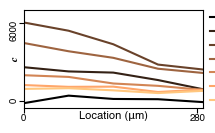

In [6]:
if 3 in figs_to_plot[i_fig]:
### Over space
    fig = plt.figure(figsize=(7*0.35, 0.5*7/2*0.66))
    plt.subplots_adjust(right=0.79, top=0.98, left=0.06, bottom=0.13)
    # set left, right, top, bottom to 0.1, 0.9, 0.9, 0.1
    #plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='over_location', d3_alpha=0.85,
                    colormap=colormaps[1])
    #plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend(lines, legend,
                        fontsize=SMALL_SIZE, frameon=False, ncol=1,
                        columnspacing=0.1, handletextpad=0.1, handlelength=0.5,
                        loc='upper right',
                        bbox_to_anchor=(0.99, 1.05),  mode="expand")
    plt.yticks(rotation=90, ticks=[0, 6000]) 
    plt.gca().tick_params(axis='y', pad=0)
    plt.gca().tick_params(axis='x', pad=1)
    plt.ylabel(r"$\boldsymbol{c}$", labelpad=0)
    plt.gca().yaxis.set_label_coords(-0.02,0.5)

    plt.xticks(ticks=[0, 280])
    plt.xlabel("Location ("+u"\u03bcm"+")", labelpad=-9)
    plt.xlim([0, real_locations[-1]])
    plt.ylim([-500, 7000])
    # only 2 ticks
    #plt.locator_params(axis='y', nb
    #                   =2)
    #plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig3_over_space.pdf')




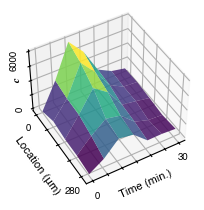

In [16]:
if 3 in figs_to_plot[i_fig]:   
    ### 3D
    fig = plt.figure(figsize=(7*0.35, 7/2*0.66))

    #plt.subplots_adjust(left=-0.6, right=1.6, top=1.6, bottom=-0.6)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='surface', d3_alpha=0.85)

    ax = plt.gca()
    #ax.view_init(45, 45)
    ax.view_init(45, 60)
    # update vertical axis to reduce number of ticks
    #plt.zticks([0, 5000], rotation=90)

    # X
    ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
    ax.set_xticklabels([0, '', '', '', '', '', 30])
    plt.gca().tick_params(axis='x', pad=-3)
    # set z label
    #ax.yaxis.set_rotate_label(False)
    ax.set_xlabel("Time (min.)", labelpad=-10)
    plt.gca().invert_xaxis()

    # Y
    ax.set_yticks([0, 70, 140, 210, 280])
    ax.set_yticklabels([0, '', '', '',280])
    plt.gca().tick_params(axis='y', pad=-2)
    # set z label
    #ax.yaxis.set_rotate_label(False)
    ax.set_ylabel("Location ("+u"\u03bcm"+") ", labelpad=-7)

    # Z
    ax.set_zticks([0, 1500, 3000, 4500, 6000])
    ax.set_zticklabels([0,'','','', 6000], rotation=90)
    plt.gca().tick_params(axis='z', pad=-2)
    # set z label
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r"$\boldsymbol{c}$", rotation=90, labelpad=-15)
    # zlabel location
    # rotate z label
    #ax.zaxis.set_label_coords(0, 0, 0)

    #ax.zaxis.set_major_locator(plt.MaxNLocator(2))
    ax.set_box_aspect(aspect=None)#, zoom=0.75)
    #plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig3_surface.pdf', bbox_inches='tight', pad_inches=0.01)



20020


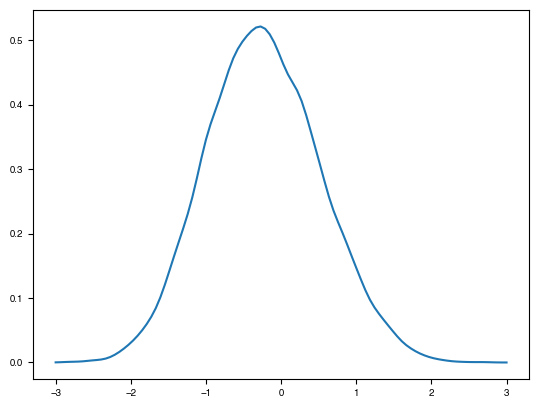

In [8]:
all_samples_a_array = np.array(all_samples_a).flatten()
# plot KDE
fig, ax = plt.subplots(1,1)
from scipy.stats import gaussian_kde
kde = gaussian_kde(all_samples_a_array)
x = np.linspace(-3, 3, 100)
y = kde(x)
ax.plot(x, y)
print(len(all_samples_a_array))


Appendix figure

In [9]:
animal_ear_app = [case for case in all_animals_ears if case not in animal_ear]

In [10]:
animal_ear_app 

[('m1', 'r'), ('m2', 'l'), ('m2', 'r'), ('m3', 'r'), ('m4', 'l'), ('m6', 'l')]

Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-

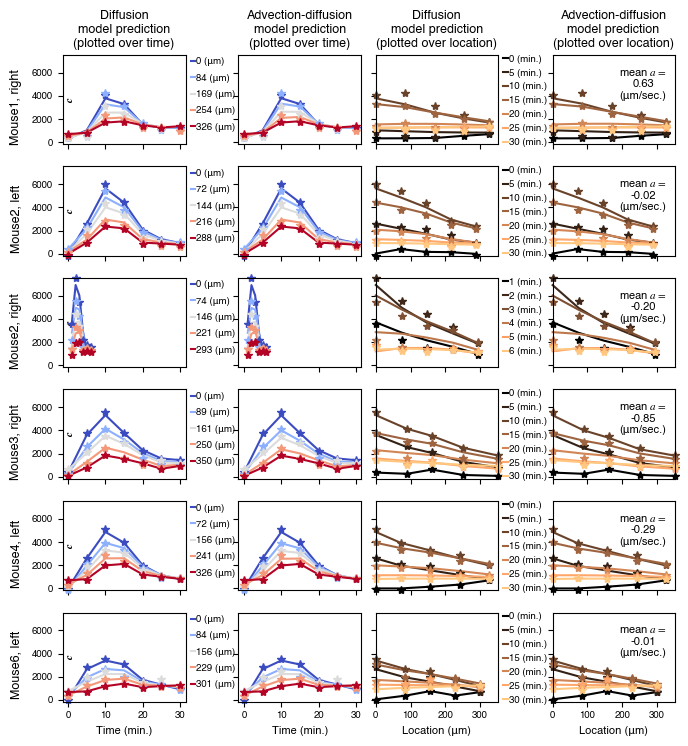

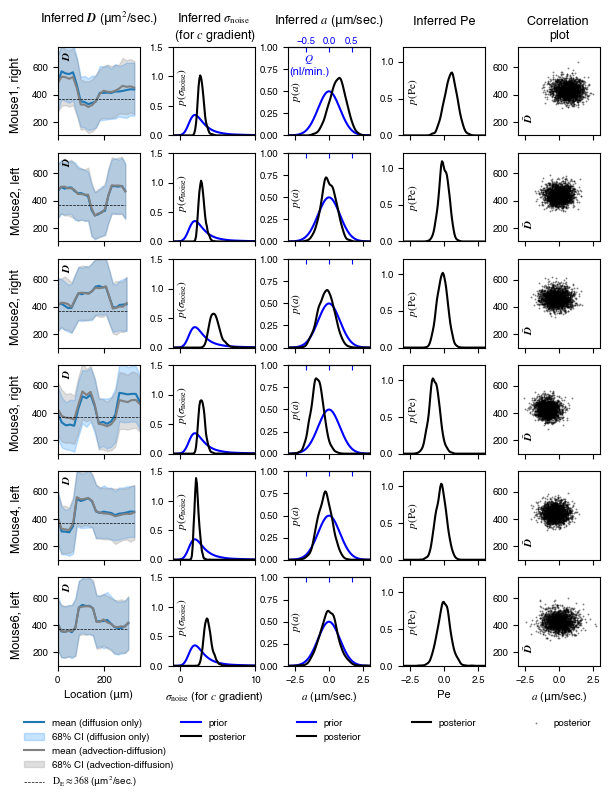

In [11]:
animal_ear_app = [case for case in all_animals_ears if case not in animal_ear]
# remove None
 
#animal_ear = [
#    ('m2', 'l')
#    ]

data_diff_list_app, data_adv_list_app = read_all_scenarios_2(scenarios_dir[i_fig], scenario_tags_list[i_fig], animal_ear_app)


# create directory if it does not exist
import os
os.makedirs('figures/'+scenario_tags_list[i_fig][0], exist_ok=True)


if 1 in figs_to_plot[i_fig]:

        plot_v3_fig1_c( data_diff_list_app, data_adv_list_app, colormaps=colormaps)
        #plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig1_app.pdf', bbox_inches='tight') 
        pass
if 2 in figs_to_plot[i_fig]:
        all_samples_a = plot_v3_fig2_II( data_diff_list_app, data_adv_list_app, data_diff_list_all, data_adv_list_all, add_last_row=False)
        # save figure and remove white space
        plt.savefig('figures/'+scenario_tags_list[i_fig][0]+'/fig2_app.pdf', bbox_inches='tight')
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.png')





In [12]:
#print(data_diff_list_all[0]['x_samples'].geometry.grid)
#print(data_adv_list_all[0]['x_samples'].geometry)

data_adv_list_all[0].keys()
A = create_A(data_adv_list_all[0])

print(A.pde.grid_sol)
print(A.pde.grid_sol.shape)
print(A.pde.time_steps)
print(A.pde.time_steps.shape)

[  4.95075956   9.90151912  14.85227868  19.80303823  24.75379779
  29.70455735  34.65531691  39.60607647  44.55683603  49.50759558
  54.45835514  59.4091147   64.35987426  69.31063382  74.26139338
  79.21215293  84.16291249  89.11367205  94.06443161  99.01519117
 103.96595073 108.91671029 113.86746984 118.8182294  123.76898896
 128.71974852 133.67050808 138.62126764 143.57202719 148.52278675
 153.47354631 158.42430587 163.37506543 168.32582499 173.27658454
 178.2273441  183.17810366 188.12886322 193.07962278 198.03038234
 202.98114189 207.93190145 212.88266101 217.83342057 222.78418013
 227.73493969 232.68569925 237.6364588  242.58721836 247.53797792
 252.48873748 257.43949704 262.3902566  267.34101615 272.29177571
 277.24253527 282.19329483 287.14405439 292.09481395 297.0455735
 301.99633306]
(61,)
[   0.           25.71428571   51.42857143   77.14285714  102.85714286
  128.57142857  257.14285714  385.71428571  514.28571429  642.85714286
  771.42857143  900.         1028.57142857 115

In [13]:
Ess_global = []
for i in range(10):
    Ess_global.extend(data_diff_list_all[i]['x_samples'].compute_ess().tolist())
    Ess_global.extend(data_adv_list_all[i]['x_samples'].compute_ess().tolist())

In [14]:
Ess_global = np.array(Ess_global)
print(Ess_global.min())
print(Ess_global.max())
print(Ess_global.mean())

1498.4662613730245
3361.164470105779
2448.0438829605523


In [15]:
data_diff_list_all[0]['experiment_par']

Namespace(animal='m1', ear='l', version='paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat', sampler='NUTSWithGibbs', unknown_par_type='constant', unknown_par_value=['100.0'], data_type='real', inference_type='heterogeneous', Ns=2000, Nb=2, noise_level='0.2', add_data_pts=[], num_CA=5, num_ST=0, true_a=0.0, rbc='fromDataClip', adaptive=True, NUTS_kwargs={'max_depth': 10, 'step_size': 0.1, 'enable_FD': True}, data_grad=True, u0_from_data=True, sampler_callback=True, pixel_data=False)